In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from matplotlib import pyplot as plt
from autograd import elementwise_grad
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

In [26]:
%matplotlib inline

# Problem 1

Consider the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = .05 u_{xx}, \quad x \in [0,1], \quad t \in [0,1]\\
	&{ } u(0,t) = 0,\quad u(1,t) = 0,\\
	&{ } u(x,0) = 2\max\{.2 - |x-.5|,0\}.
	\end{split}
\end{align}

Approximate the solution $u(x,t)$ at time $t = .4$ by taking 6 subintervals in the $x$ dimension and 10 subintervals in time.

In [35]:
def heat(x0, xf, t0, tf, nu, uL, uR, f, I=50, J=50):
    ''' Numerically solves the head equation using
        finite difference schemes
        Parameters:
            :param x0: float, defines the left spatial endpoint
            :param xf: float, defines the right spatial endpoint
            :param t0: float, starting time
            :param tf: float, final time
            :param nu: float, diffusion constant
            :param uL: callable, left boundary condition
            :param uR: callable, right boundary condition
            :param f: callable, initial value for x
            :param J: int, spatial discretization
            :param M: int, temporal discretization
        :return:
            x_vals ((J+1, ), discretized values)
            U ((M+1, J+1), np.ndarray)
    '''
    #get spatial and temporal discritezation
    #as well as well as stepping values
    x_vals = np.linspace(x0, xf, I+1)
    t_vals = np.linspace(t0, tf, J+1)
    h = np.abs(x_vals[-1] - x_vals[-2])
    k = np.abs(t_vals[-1] - t_vals[-2])
    lam = nu*k/h**2


    #construct A matrix
    #main diagonal
    A_diag = (1-2*lam)*np.ones(I+1)
    A_diag[0] = 1
    A_diag[-1] - 1
    A_diag = np.diag(A_diag, k=0)
    #super diagonal
    A__sup_diag = lam*np.ones(I)
    A__sup_diag[0] = 0
    A_sup_diag = np.diag(A__sup_diag, k=1)
    #sub diagonal
    A_sub_diag = A__sup_diag
    A_sub_diag[0] = lam
    A_sub_diag[-1] = 0
    A_sub_diag = np.diag(A_sub_diag, k=-1)

    A = A_sub_diag + A_sup_diag + A_diag

    #now we can start our iterations
    U_0 = f(x_vals)
    U_1 = A @ U_0
    U = np.vstack((U_0, U_1))
    for i in range(2, J+1):
        U_curr =  A@U[i-1]
        U = np.vstack((U, U_curr))

    #now we enforce our boundary conditions
    U[:, 0] = uL(t_vals)
    U[:, -1] = uR(t_vals)

    return x_vals, U

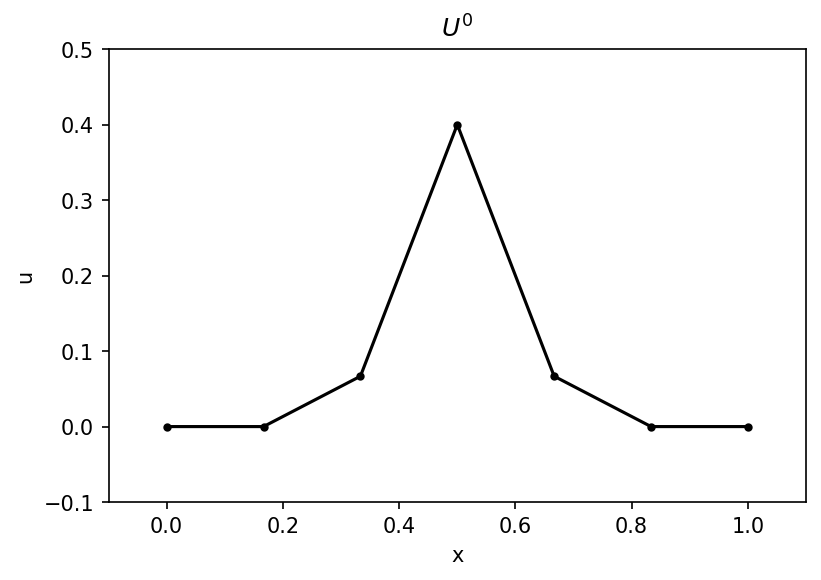

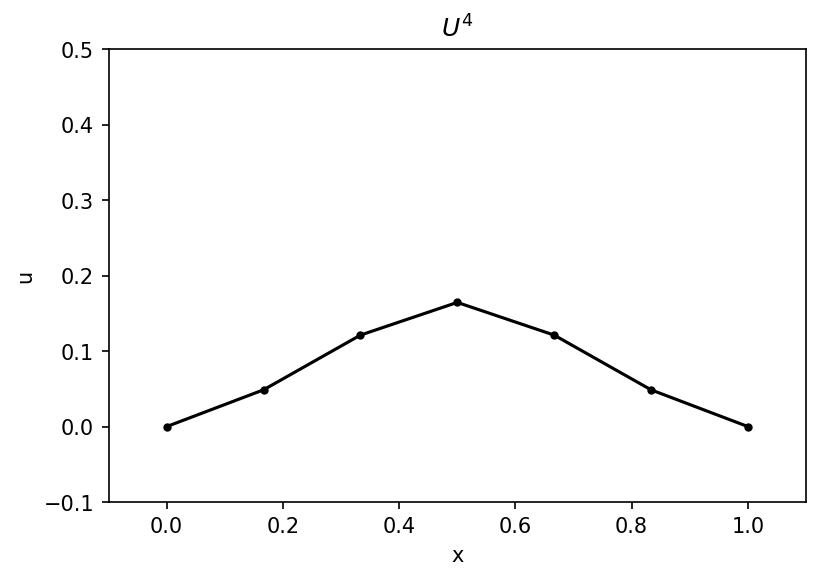

In [28]:
def problem1():
    """ Function for problem 1
    """
    #set constants
    x0, xf, t0, tf, nu = 0, 1, 0, 1, 1/20.
    #define callables
    uL = lambda t: t*0.0
    uR = lambda t: t*0.0
    def f1 (x_vals):
        x_vals = np.atleast_1d(x_vals)
        return 2*np.array([max(1/5. - np.abs(x-1/2.), 0)\
                           for x in x_vals])
    #solve our system
    x_vals, U = heat(x0, xf, t0, tf, nu, uL,
                     uR, f1, I=6, J=10)
    #plot
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.set_title(r'$U^0$')
    ax.plot(x_vals, U[0], color='k', marker='.')
    ax.set_xlabel('x')
    ax.set_xlim(-1/10., 11/10.)
    ax.set_ylim(-1/10., 1/2.)
    ax.set_ylabel('u')
    plt.show()
    print()
    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.set_title(r'$U^4$')
    ax.plot(x_vals, U[4], color='k', marker='.')
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    ax.set_xlim(-1/10., 11/10.)
    ax.set_ylim(-1/10., 1/2.)
    plt.show()
    return

problem1()

# Problem 2

Solve the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1], \\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}
	\end{split}
\end{align}

using the first order explicit method (1.1).
Use 140 subintervals in the $x$ dimension and 70 subintervals in time.
The initial and final states are shown in Figures 1 and 2.
Animate your results.

Explicit methods usually have a stability condition, called a CFL condition (for Courant-Friedrichs-Lewy).
For method (1.1) the CFL condition that must be satisfied is that:

$$\lambda \leq \frac{1}{2}$$

Repeat your computations using 140 subintervals in the $x$ dimension and 66 subintervals in time. Animate the results.
For these values the CFL condition is broken; you should easily see the result of this instability in the approximation $U^{66}$.


In [36]:
def problem2_vals():
    """ returns the values for problem 2
    """
    #set constants
    x0, xf, t0, tf, nu = -12, 12, 0, 1, 1
    #define callables
    uL = lambda t: t*0.0
    uR = lambda t: t*0.0
    def f2 (x_vals):
        x_vals = np.atleast_1d(x_vals)
        return np.array([max(1 - x**2, 0) for x in x_vals])

    #solve our system
    x_vals_1, U_1 = heat(x0, xf, t0, tf, nu, uL,
                        uR, f2, I=140, J=70)
    x_vals_2, U_2 = heat(x0, xf, t0, tf, nu, uL,
                         uR, f2, I=140, J=66)


    return x_vals_1, U_1, x_vals_2, U_2
x_vals_1, U_1, x_vals_2, U_2 = problem2_vals()

## First Animation (stable)

In [39]:
#animate
plt.ioff()
fig = plt.figure()
fig.set_dpi(125)
ax = fig.add_subplot(111)
ax.set_xlim(-12, 12)
plt.suptitle(r'Stable Heat equation')
#update function
def update2_1(i):
    ax.clear()
    ax.set_ylim(0, 1)
    ax.plot(x_vals_1, U_1[i])
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    return ax

ani = animation.FuncAnimation(fig, update2_1,
                              frames = U_1.shape[0], 
                              interval=25)
plt.close()
HTML(ani.to_html5_video())

In [40]:
#animate
plt.ioff()
fig = plt.figure()
fig.set_dpi(125)
ax = fig.add_subplot(111)
ax.set_xlim(-12, 12)
plt.suptitle(r'Unstable Heat equation')
#update function
def update2_2(i):
    ax.clear()
    ax.set_ylim(0, 1)
    ax.plot(x_vals_2, U_2[i])
    ax.set_xlabel('x')
    ax.set_ylabel('u')
    return ax

ani = animation.FuncAnimation(fig, update2_2,
                              frames = U_2.shape[0], 
                              interval=25)
plt.close()
HTML(ani.to_html5_video())

# Problem 3

Using the Crank Nicolson method, numerically approximate the solution $u(x,t)$ of the problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1],\\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}.
	\end{split}
\end{align}

Demonstrate that the numerical approximation at $t = 1$ converges to  $u(x,t=1)$.
Do this by computing $U$ at $t=1$ using $20,40,80,160,320$, and $640$ steps.
Use the same number of steps in both time and space.
Reproduce the loglog plot shown in Figure 4.
The slope of the line there shows the proper rate of convergence.

To measure the error, use the solution with the smallest $h$ (largest number of intervals) as if it were the exact solution, then sample each solution only at the x-values that are represented in the solution with the largest $h$ (smallest number of intervals).
Use the $\infty$-norm on the arrays of values at those points to measure the error.

Notice that, since the Crank-Nicolson method is unconditionally stable, there is no CFL condition and we can use the same number of intervals in time and space.

In [33]:
def heat_cn(x0, xf, t0, tf, nu, uL, uR, f, I=50, J=50):
    ''' Numerically solves the head equation using
        the Crank Nicolson method.
        Parameters:
            :param x0: float, defines the left spatial endpoint
            :param xf: float, defines the right spatial endpoint
            :param t0: float, starting time
            :param tf: float, final time
            :param nu: float, diffusion constant
            :param uL: callable, left boundary condition
            :param uR: callable, right boundary condition
            :param f: callable, initial value for x
            :param J: int, spatial discretization
            :param M: int, temporal discretization
        :return:
            x_vals ((J+1, ), discretized values)
            U ((M+1, J+1), np.ndarray)
    '''
    #get spatial and temporal discritezation
    #as well as well as stepping values
    x_vals = np.linspace(x0, xf, I+1)
    t_vals = np.linspace(t0, tf, J+1)
    h = np.abs(x_vals[-1] - x_vals[-2])
    k = np.abs(t_vals[-1] - t_vals[-2])
    lam = nu*k/(2*h**2)

    #construct A matrix
    #main diagonal
    A_diag = (1-2*lam)*np.ones(I+1)
    A_diag[0] = 1
    A_diag[-1] = 1
    A_diag = np.diag(A_diag, k=0)
    #super diagonal
    A__sup_diag = lam*np.ones(I)
    A__sup_diag[0] = 0
    A_sup_diag = np.diag(A__sup_diag, k=1)
    #sub diagonal
    A_sub_diag = A__sup_diag
    A_sub_diag[0] = lam
    A_sub_diag[-1] = 0
    A_sub_diag = np.diag(A_sub_diag, k=-1)
    A = A_sub_diag + A_sup_diag + A_diag

    #construct B matrix
    #main diagonal
    B_diag = (1 + 2*lam)*np.ones(I+1)
    B_diag[0] = 1
    B_diag[-1] = 1
    B_diag = np.diag(B_diag, k=0)
    #super diagonal
    B__sup_diag = -lam*np.ones(I)
    B__sup_diag[0] = 0
    B_sup_diag = np.diag(B__sup_diag, k=1)
    #sub diagonal
    B_sub_diag = B__sup_diag
    B_sub_diag[0] = -lam
    B_sub_diag[-1] = 0
    B_sub_diag = np.diag(B_sub_diag, k=-1)
    B = B_sub_diag + B_sup_diag + B_diag
    #invert matrix and apply matrix multiplication now to save time
    C = la.inv(B)@A

    #now we can start our iterations
    U_0 = f(x_vals)
    U_1 = C@U_0
    U = np.vstack((U_0, U_1))
    for i in range(2, J+1):
        U_curr =  C@U[i-1]
        U = np.vstack((U, U_curr))

    #now we enforce our boundary conditions
    U[:, 0] = uL(t_vals)
    U[:, -1] = uR(t_vals)

    return x_vals, U

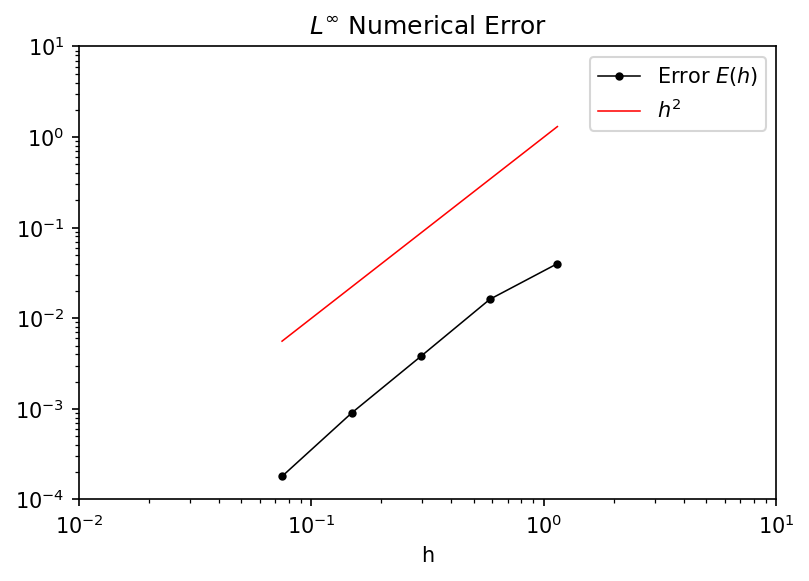

In [34]:
def problem3():
    'returns the values needed for problem 3'
    #set constants
    x0, xf, t0, tf, nu = -12, 12, 0, 1, 1
    #define callables
    uL = lambda t: t*0.0
    uR = lambda t: t*0.0
    def f2 (x_vals):
        x_vals = np.atleast_1d(x_vals)
        return np.array([max(1 - x**2, 0) for x in x_vals])

    #define number of steps to use
    step_vals = np.array([640, 320, 160, 80, 40, 20])
    h_vals = (xf - x0) / (step_vals + 1)
    #get the solution values at time 1
    Error = []
    for i, step in enumerate(step_vals):
        if i == 0:
            #true solution
            true_sol = heat_cn(x0, xf, t0, tf, nu, uL, uR, f2, I=step, J=step)[-1][-1]
        else:
            #approximate solution
            approx_sol = heat_cn(x0, xf, t0, tf, nu, uL, uR, f2, I=step, J=step)[-1][-1]
            #error using L_infty norm
            curr_error = la.norm(true_sol[::int(2**i)] - approx_sol, ord=np.inf)
            Error.append(curr_error)

    fig = plt.figure()
    fig.set_dpi(150)
    ax = fig.add_subplot(111)
    ax.loglog(h_vals[1:], Error, color='k', marker='.', linewidth=0.75, label=r'Error $E(h)$')
    ax.loglog(h_vals[1:], h_vals[1:]**2, 'r-', linewidth=0.75, label=r'$h^2$')
    ax.legend(loc='best')
    ax.set_xlabel('h')
    ax.set_xlim(1e-2, 1e1)
    ax.set_ylim(1e-4, 1e1)
    ax.set_title(r'$L^\infty$ Numerical Error')
    plt.show()

    return 

problem3()